##### What factors made people more likely to survive in Titanic? (Hangi faktörler Titanik'te insanların hayatta kalma olasılığını daha çok arttırdı?)

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
passengers = titanic_df[['Fare', 'Survived']]

In [6]:
passengers.dropna()
passengers.describe()

,Fare,Survived
count,891.000000,891.000000
mean,32.204208,0.383838
std,49.693429,0.486592
min,0.000000,0.000000
25%,7.910400,0.000000
50%,14.454200,0.000000
75%,31.000000,1.000000
max,512.329200,1.000000


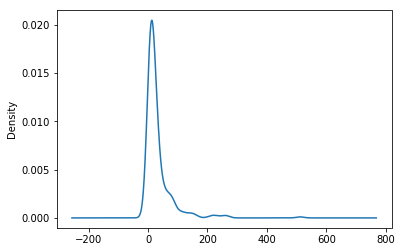

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

passengers['Fare'].plot(kind='kde')

In [13]:
bucket_intervals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 150, 1000]
spending_categories = passengers.groupby([pd.cut(passengers['Fare'], bucket_intervals)])
spending_categories.count()

,Fare,Survived
Fare,,
"(0, 10]",321,321
"(10, 20]",179,179
"(20, 30]",142,142
"(30, 40]",58,58
"(40, 50]",16,16
"(50, 60]",38,38
"(60, 70]",17,17
"(70, 80]",31,31
"(80, 90]",17,17


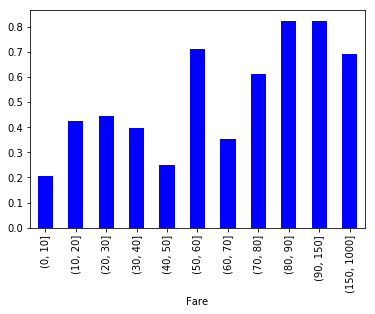

In [14]:
spending_categories['Survived'].mean().plot.bar(color='blue');

In [39]:
spending_categories = passengers.groupby([pd.qcut(passengers['Fare'], q=8)])
spending_categories.count()

,Fare,Survived
Fare,,
"(-0.001, 7.75]",140,140
"(7.75, 7.91]",83,83
"(7.91, 9.841]",111,111
"(9.841, 14.454]",113,113
"(14.454, 24.479]",110,110
"(24.479, 31.0]",112,112
"(31.0, 69.488]",110,110
"(69.488, 512.329]",112,112


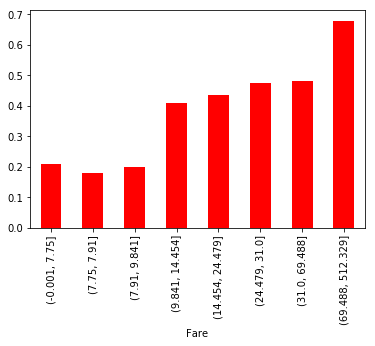

In [40]:
spending_categories['Survived'].mean().plot.bar(color='red');

In [41]:
passengers['Survived'].corr(passengers['Fare'], method='pearson')

0.25730652238496227

In [42]:
passengers = pd.read_csv('./titanic_data.csv')

survived_to_siblings = passengers['Survived'].corr(passengers['SibSp'], method='pearson')
print("Correlation between survival and number of siblings/spouses on board: \t{}".format(survived_to_siblings))

survived_to_parents = passengers['Survived'].corr(passengers['Parch'], method='pearson')
print("Correlation between survival and number of parents on board: \t\t{}".format(survived_to_parents))

survived_to_age = passengers['Survived'].corr(passengers['Age'], method='pearson')
print("Correlation between survival and age: \t\t\t\t\t{}".format(survived_to_age))

Correlation between survival and number of siblings/spouses on board: 	-0.03532249888573559
Correlation between survival and number of parents on board: 		0.08162940708348365
Correlation between survival and age: 					-0.07722109457217764


# SECOND PART

In [34]:
titanic_df = pd.read_csv('titanic_data.csv')

In [35]:
titanic_df = titanic_df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch']]

In [46]:
titanic_df.head(10)

,Survived,Sex,Age,SibSp,Parch
0,0,male,22.0,1,0
1,1,female,38.0,1,0
2,1,female,26.0,0,0
3,1,female,35.0,1,0
4,0,male,35.0,0,0
6,0,male,54.0,0,0
7,0,male,2.0,3,1
8,1,female,27.0,0,2
9,1,female,14.0,1,0
10,1,female,4.0,1,1


In [41]:
titanic_df = titanic_df.dropna()

In [47]:
titanic_df.head()

,Survived,Sex,Age,SibSp,Parch
0,0,male,22.0,1,0
1,1,female,38.0,1,0
2,1,female,26.0,0,0
3,1,female,35.0,1,0
4,0,male,35.0,0,0


In [50]:
titanic_df_by_sex = titanic_df.groupby(["Sex"]).sum()["Survived"]
titanic_df_by_sex

Sex
female    197
male       93
Name: Survived, dtype: int64

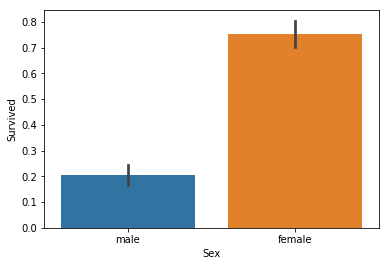

In [59]:
sns.barplot(x = titanic_df["Sex"], y = titanic_df["Survived"], data = titanic_df);

In [60]:
titanic_df_by_sibling = titanic_df.groupby(["SibSp"]).sum()["Survived"]
titanic_df_by_sibling

SibSp
0    175
1     97
2     11
3      4
4      3
5      0
Name: Survived, dtype: int64

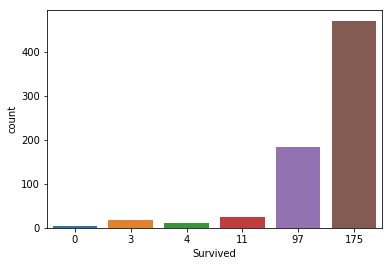

In [64]:
sns.countplot(x=titanic_df["SibSp"], data=titanic_df_by_sibling)

In [65]:
titanic_df_by_age = titanic_df.groupby(["Survived"]).mean()["Age"]
titanic_df_by_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

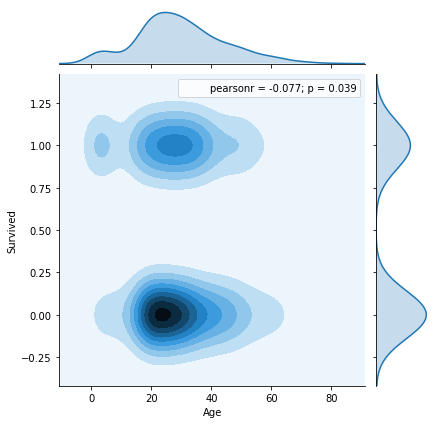

In [68]:
sns.jointplot("Age", "Survived", data=titanic_df , kind="kde")

In [70]:
titanic_df_by_parents = titanic_df.groupby(["Survived"]).mean()["Parch"]
titanic_df_by_parents

Survived
0    0.365566
1    0.527586
Name: Parch, dtype: float64

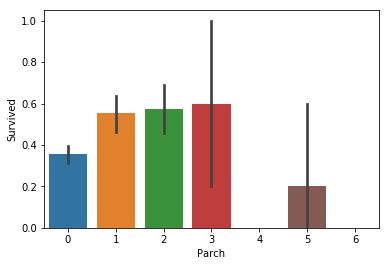

In [74]:
sns.barplot(x = titanic_df["Parch"], y = titanic_df["Survived"], data = titanic_df);